In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
red_wine = pd.read_csv("winequality_red.csv", delimiter=";")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
white_wine = pd.read_csv("winequality_white.csv")
white_wine = white_wine[red_wine.columns]
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
red_wine['color'] = ['Red']* red_wine.shape[0]
white_wine['color'] = ['White']* white_wine.shape[0]
dataset = red_wine.merge(white_wine,how='outer')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [5]:
#dataset.to_csv('Wine_dataset_merged.csv',index=False)

### seperated random 50 observations for testing the model

In [6]:
indicies = np.random.randint(1,dataset.shape[0],50)
testing = dataset.iloc[indicies]
data = dataset.drop(indicies,axis=0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6448 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6448 non-null   float64
 1   volatile acidity      6448 non-null   float64
 2   citric acid           6448 non-null   float64
 3   residual sugar        6448 non-null   float64
 4   chlorides             6448 non-null   float64
 5   free sulfur dioxide   6448 non-null   float64
 6   total sulfur dioxide  6448 non-null   float64
 7   density               6448 non-null   float64
 8   pH                    6448 non-null   float64
 9   sulphates             6448 non-null   float64
 10  alcohol               6448 non-null   float64
 11  quality               6448 non-null   int64  
 12  color                 6448 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 705.2+ KB


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000
mean,7.215485,0.339909,0.318798,5.435670,0.056088,30.506048,115.698899,0.994695,3.218479,0.531383,10.491488,5.816377
std,1.296108,0.164810,0.145461,4.755355,0.035125,17.759651,56.509357,0.002999,0.160922,0.148978,1.192645,0.872569
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### **Exploring the Features**

In [9]:
for column in data.columns:
    print('Feature: ',column)
    print('Data type:',data[column].dtype)
    print( "Unique values : ", data[column].nunique())
    print()

Feature:  fixed acidity
Data type: float64
Unique values :  106

Feature:  volatile acidity
Data type: float64
Unique values :  187

Feature:  citric acid
Data type: float64
Unique values :  89

Feature:  residual sugar
Data type: float64
Unique values :  316

Feature:  chlorides
Data type: float64
Unique values :  214

Feature:  free sulfur dioxide
Data type: float64
Unique values :  135

Feature:  total sulfur dioxide
Data type: float64
Unique values :  276

Feature:  density
Data type: float64
Unique values :  997

Feature:  pH
Data type: float64
Unique values :  108

Feature:  sulphates
Data type: float64
Unique values :  111

Feature:  alcohol
Data type: float64
Unique values :  112

Feature:  quality
Data type: int64
Unique values :  7

Feature:  color
Data type: object
Unique values :  2



### **Exploratory data analysis (EDA)**

In [10]:
data['color'] = data['color'].map({'Red':0,'White':1})

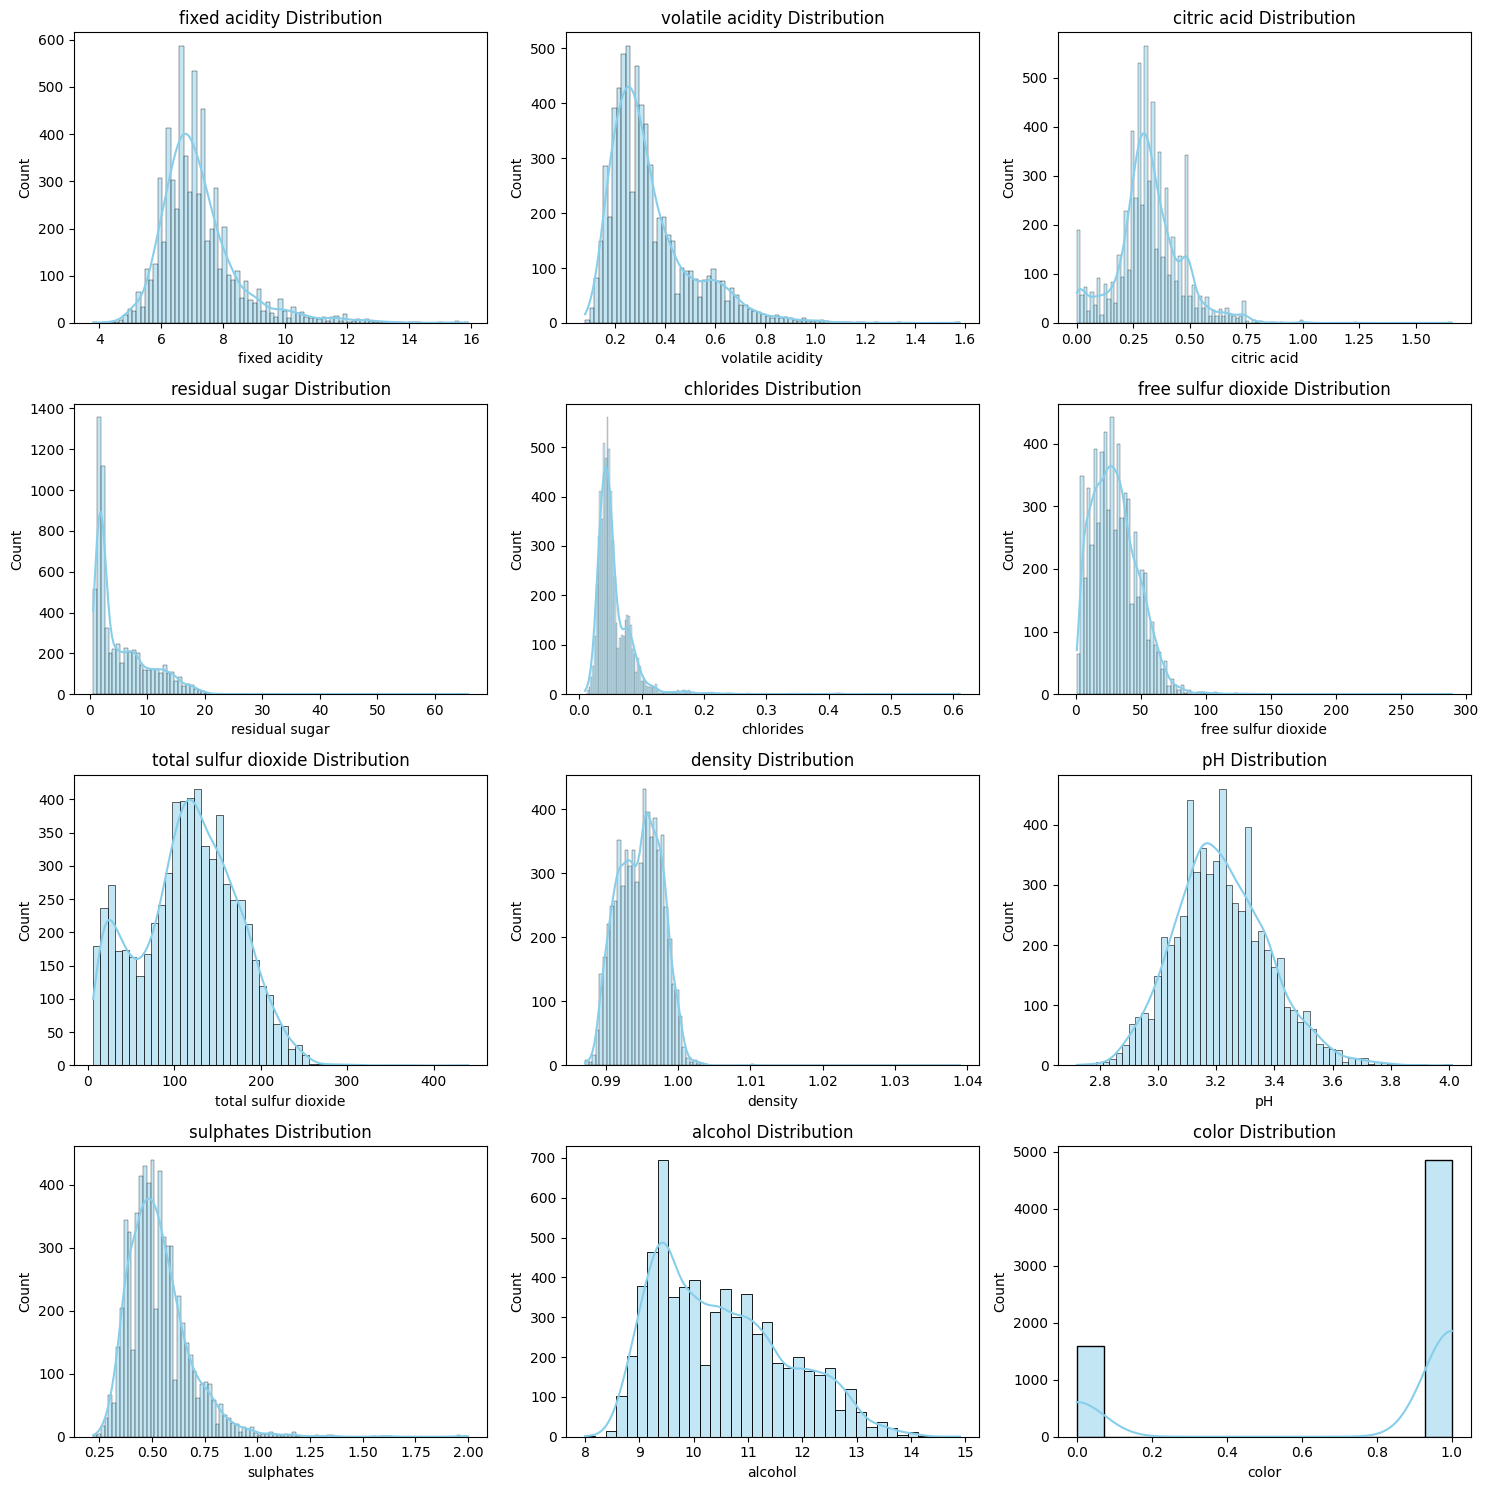

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(data.drop(columns=['quality']).columns):  
    sns.histplot(data=data, x=column, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f"{column} Distribution")

plt.tight_layout()
plt.show()


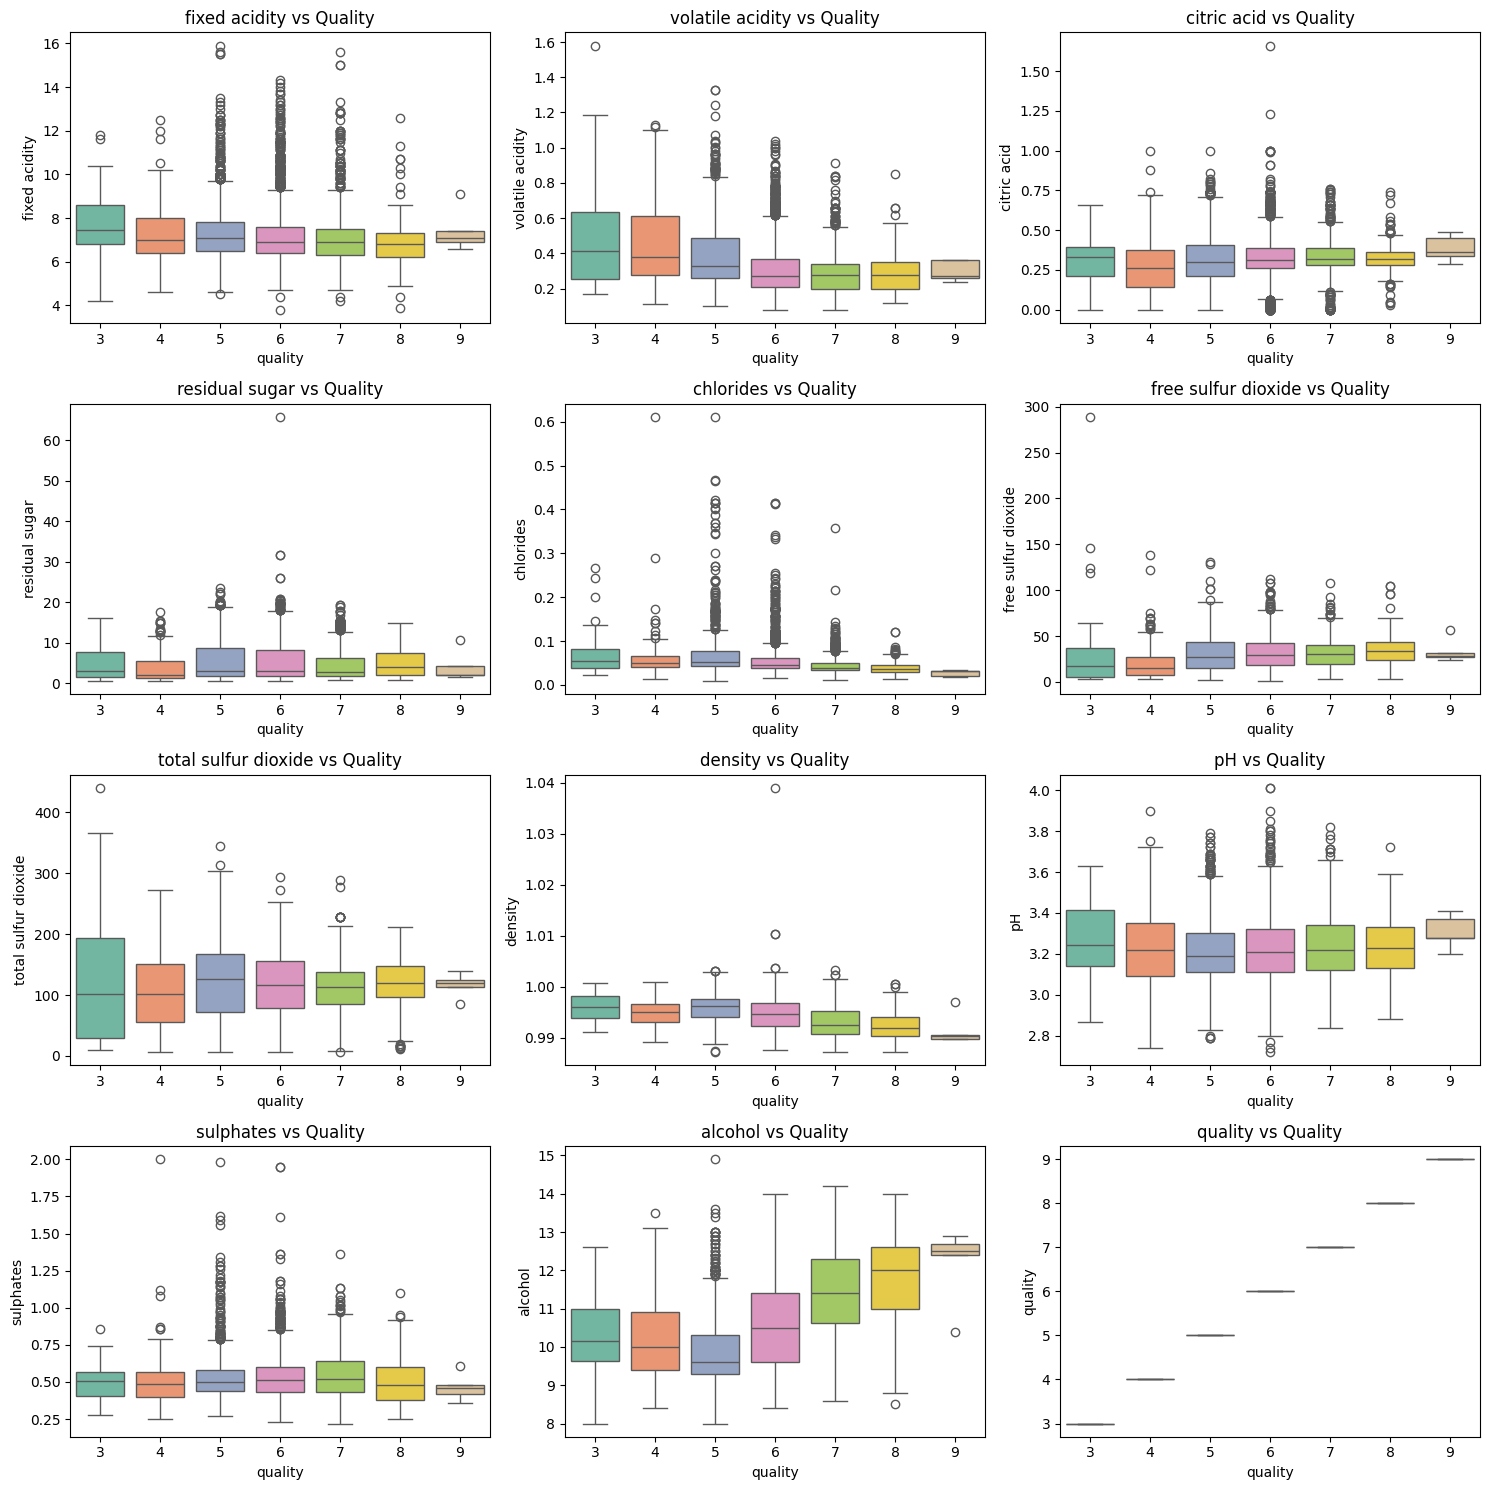

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(data.columns[:-1]): 
    sns.boxplot(data=data, x='quality', y=column, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{column} vs Quality")
plt.tight_layout()
plt.show()


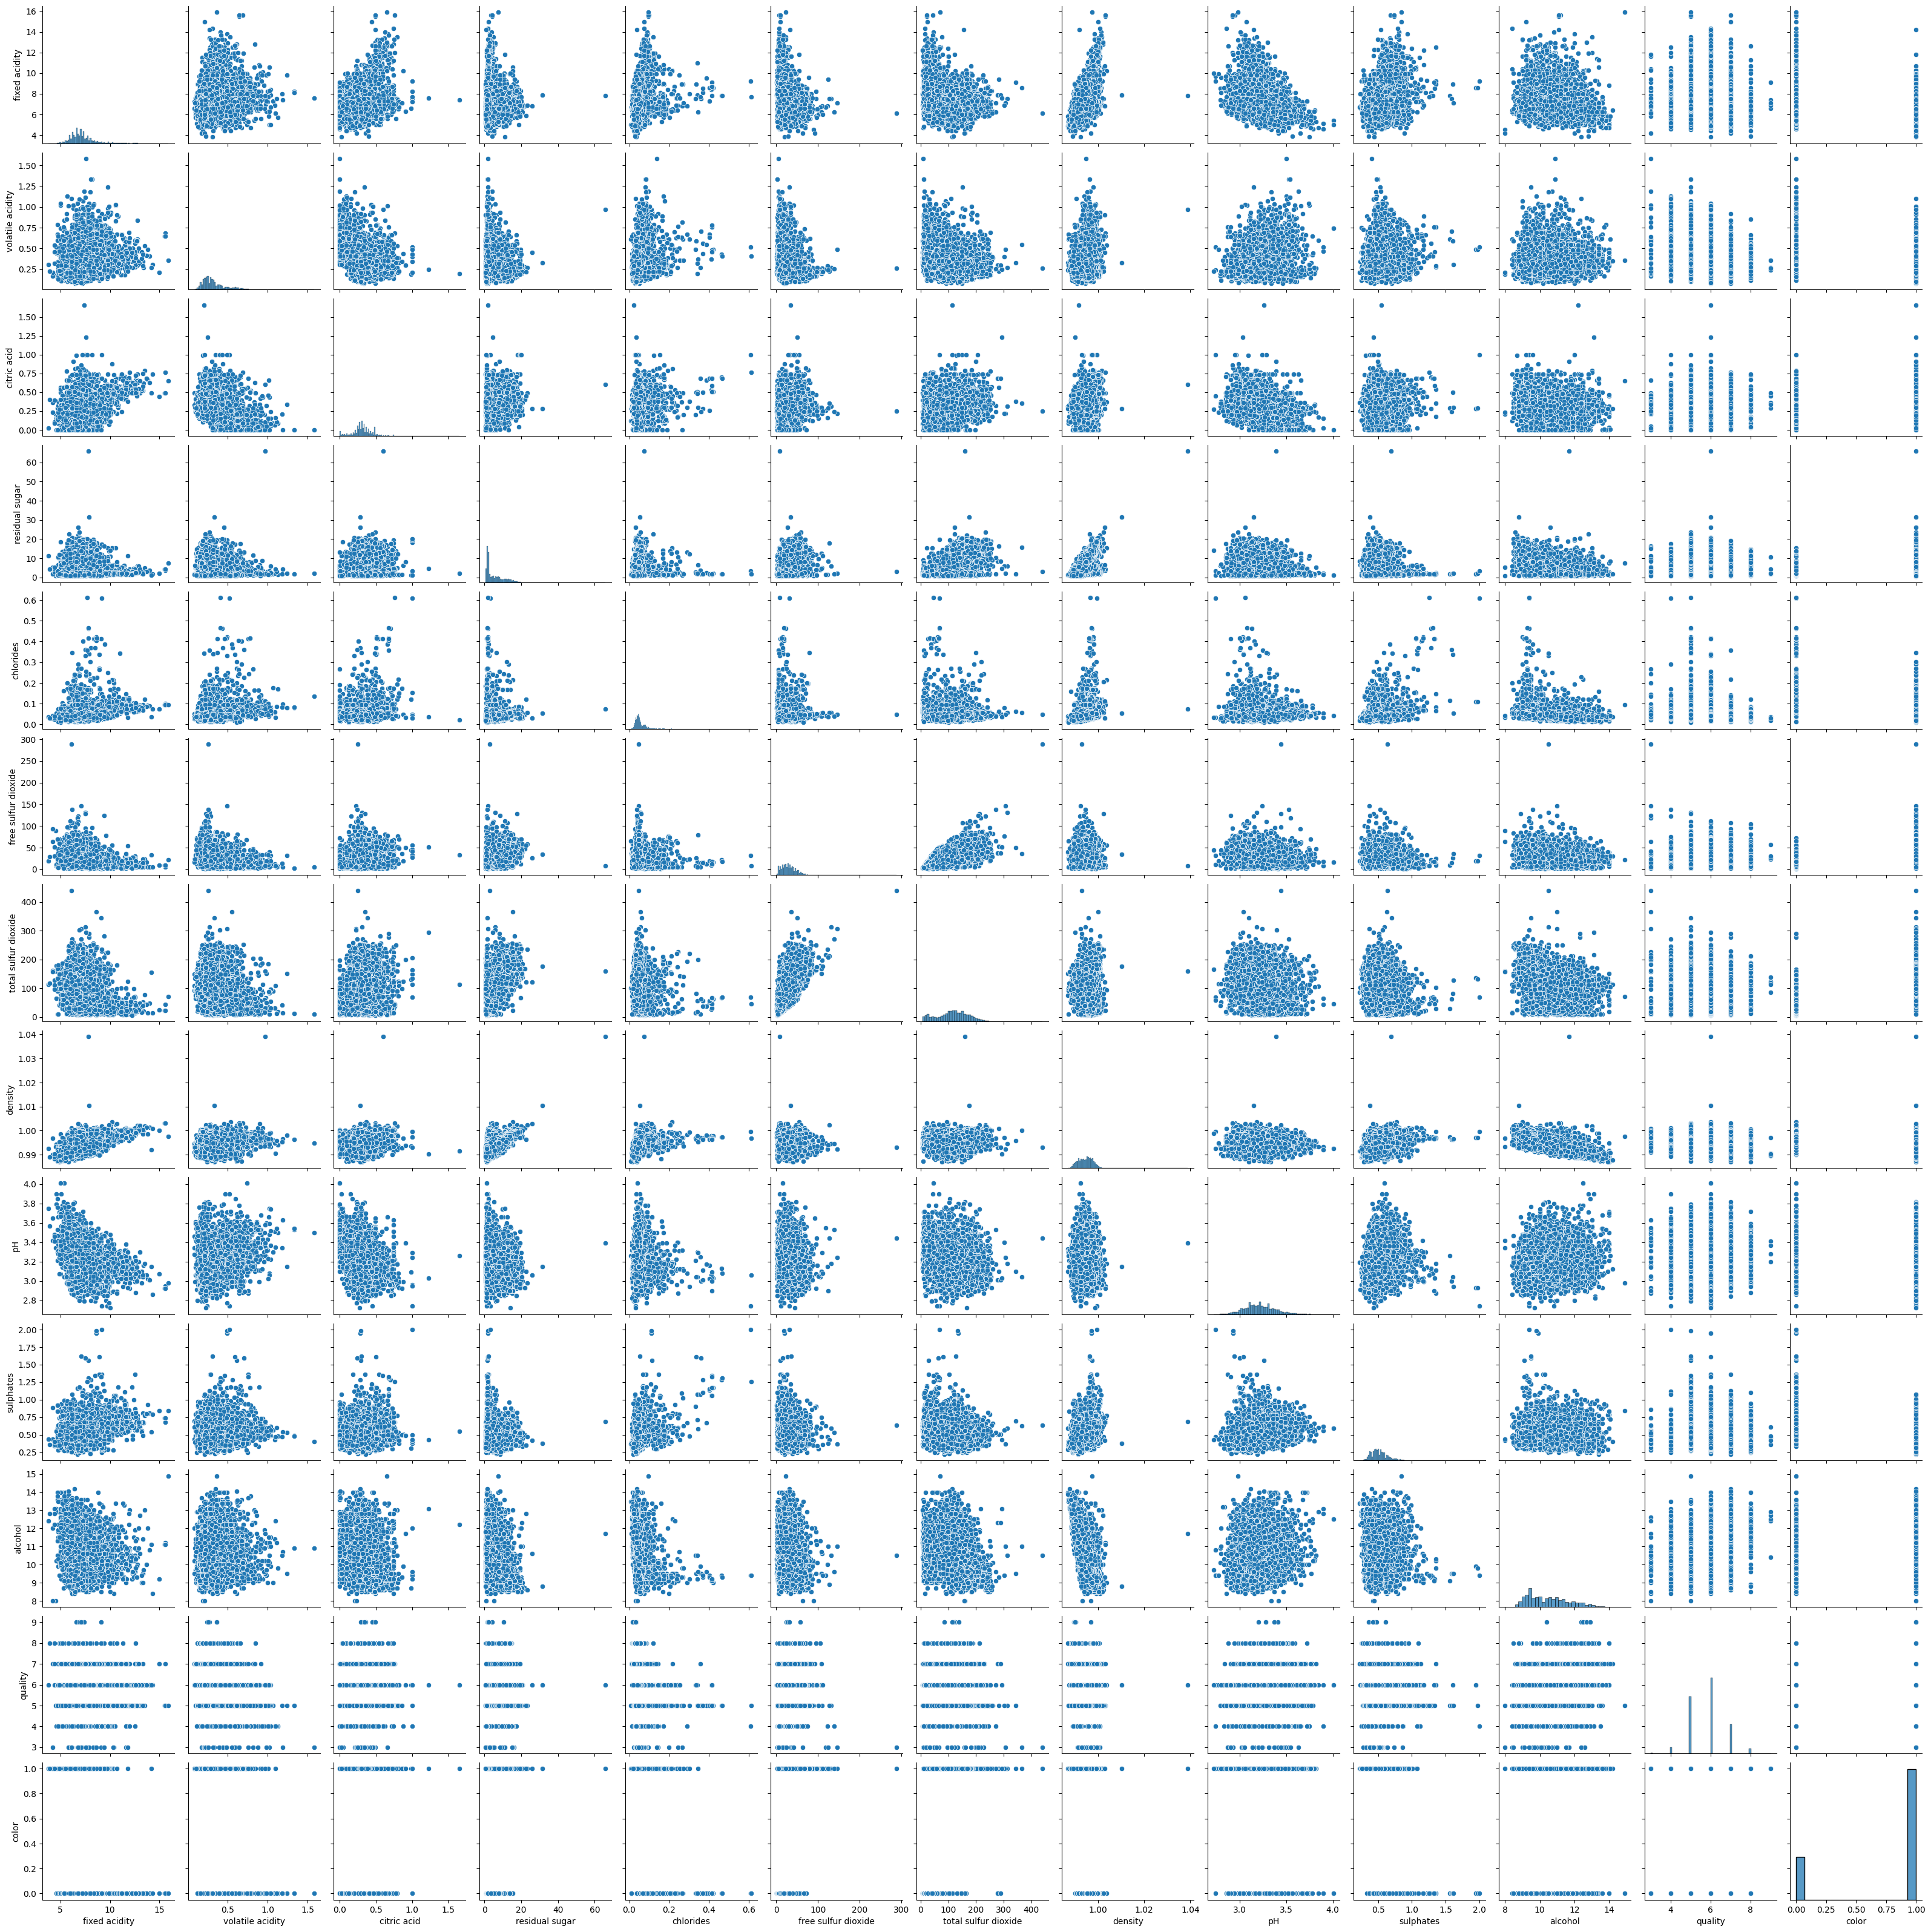

In [13]:
sns.pairplot(data)
plt.show()

### **Missing data**

In [14]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

### **Outliers**

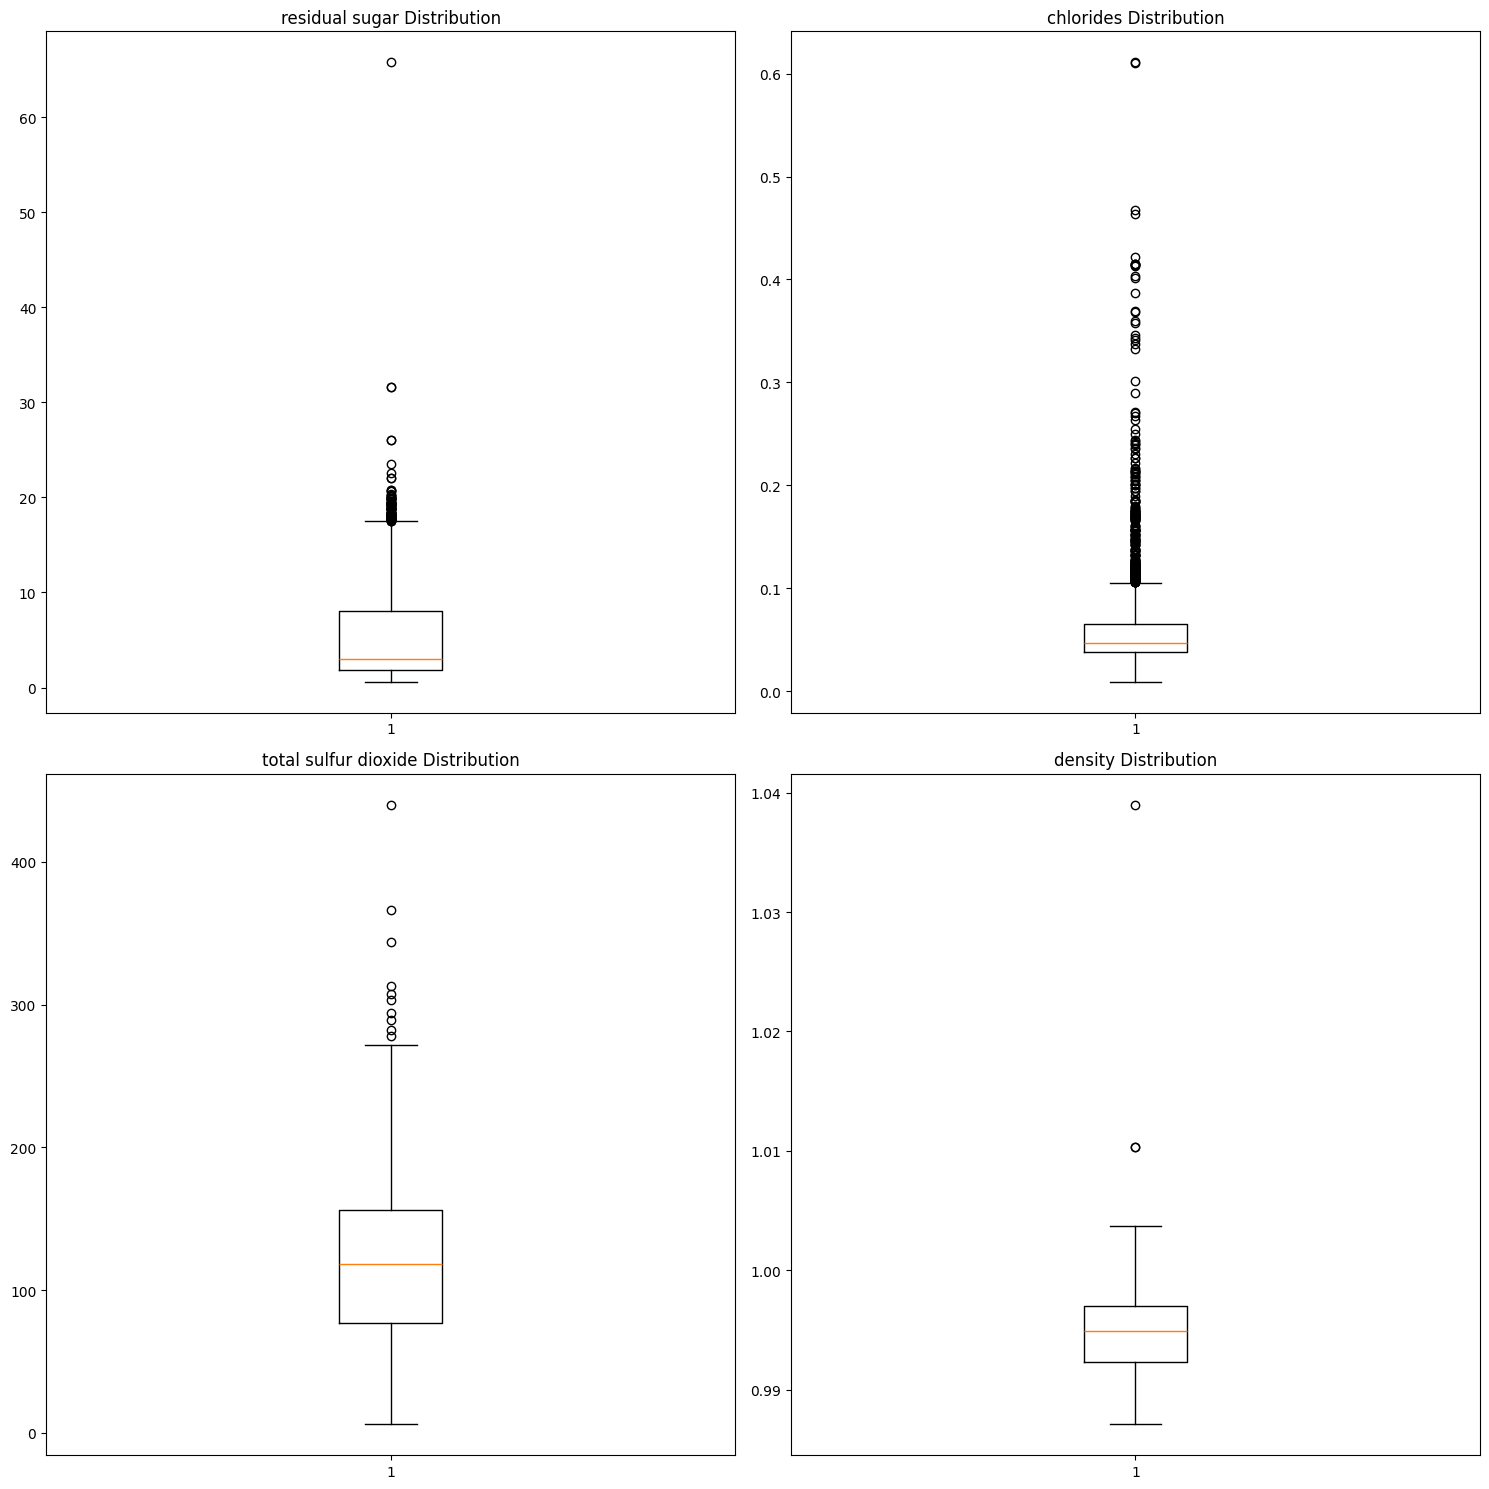

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
axes = axes.flatten()
subplot_index = 0
continous_features = []
for column in data.drop(columns=['quality']).columns:
    if data[column].nunique() > 200:
        continous_features.append(column)
        axes[subplot_index].boxplot(data[column])
        axes[subplot_index].set_title(f"{column} Distribution")
        subplot_index += 1
        if subplot_index % 4 == 0:
            subplot_index += 1 
for ax in axes[subplot_index:]:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [16]:
def outlier_upper_limit(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

rows = data.shape[0]
for column in continous_features:
    outlier_indicies =  data[data[column]> outlier_upper_limit(data,column)].index
    data = data.drop(outlier_indicies,axis=0)
print('Number of observations dropped: ',rows - data.shape[0])

Number of observations dropped:  405


### **scaling**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for column in data.drop(columns=['quality','color']).columns:
    data[column] = scaler.fit_transform(data[[column]])

In [18]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,0.166232,2.266070,-2.255945,-0.763582,1.339155,-1.133138,-1.479791,1.142380,1.784830,0.247091,-0.959529,5,0
1,0.166232,2.266070,-2.255945,-0.763582,1.339155,-1.133138,-1.479791,1.142380,1.784830,0.247091,-0.959529,5,0
2,0.478699,3.383067,-2.255945,-0.603782,2.514057,-0.316436,-0.881918,0.794638,-0.138844,1.123493,-0.623045,5,0
3,0.478699,2.638402,-1.968991,-0.672267,2.193629,-0.899794,-1.117443,0.864186,0.233480,0.904392,-0.623045,5,0
4,3.134668,-0.340257,1.761409,-0.763582,1.285750,-0.783123,-1.008739,1.211929,-0.387060,0.393158,-0.623045,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.771168,-0.774645,-0.175529,-0.832068,-0.636817,-0.374771,-0.428984,-1.173584,0.295534,-0.191110,0.554650,6,1
6493,-0.458701,-0.092036,0.326640,0.628964,-0.209580,1.550312,0.947935,0.133927,-0.449114,-0.483244,-0.791287,5,1
6494,-0.536818,-0.588479,-0.892914,-0.923382,-0.530008,-0.024756,-0.084754,-0.686745,-1.441977,-0.483244,-0.959529,6,1
6495,-1.317986,-0.278202,-0.103791,-0.946211,-1.544696,-0.608115,-0.102871,-2.025554,0.729912,-1.067512,1.900588,7,1


### **Multicollinearity**

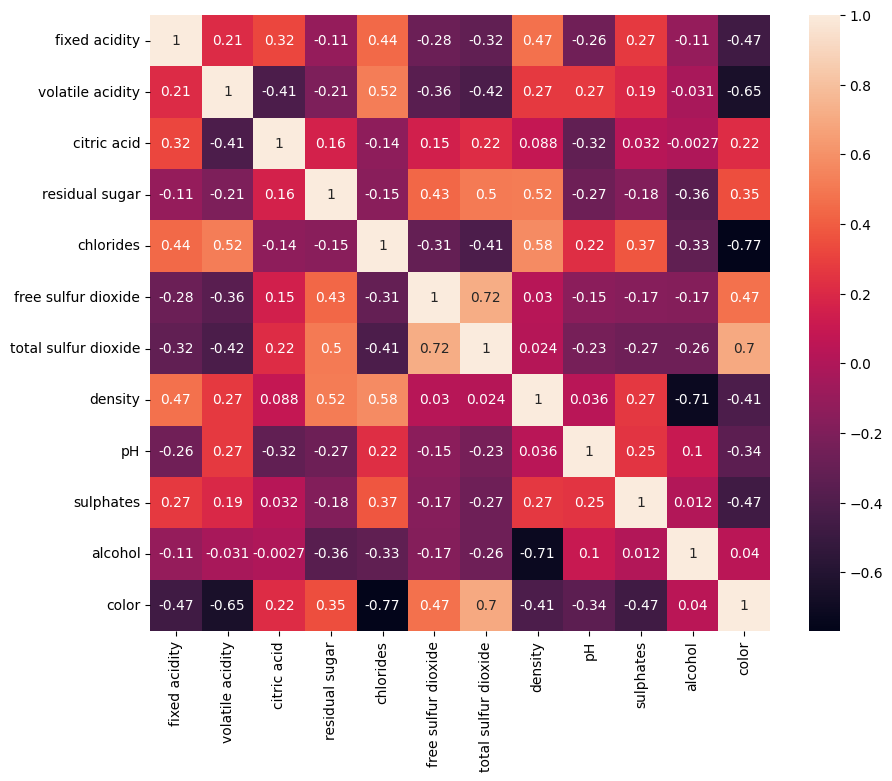

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop(columns=['quality']).corr(),annot=True)
plt.show()

### These features are correlated (correlation value > 0.65 or < -0.65)
    volatile acidity ~ color
    chlorides ~ color
    density ~ alcohol

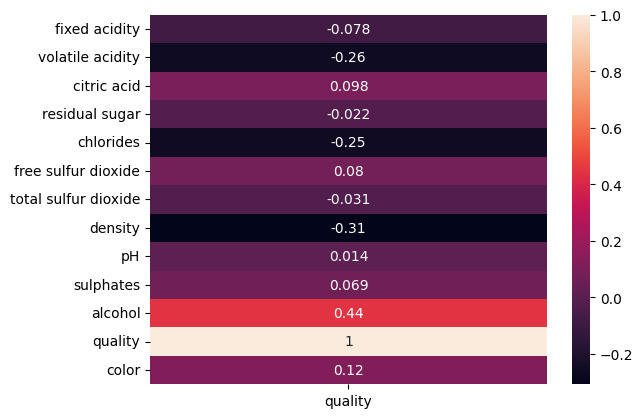

In [20]:
sns.heatmap(data.corr()[['quality']],annot=True)
plt.show()

### After comparing all the features with the target variable, 'color' & 'density' are less correlated with the target variable. So we are removing these features.

In [21]:
data.drop(columns=['color','density'],inplace=True)

### **Feature Selection**

#### Imbalanced data

quality
6    2666
5    1915
7    1043
4     205
8     187
3      22
9       5
Name: count, dtype: int64


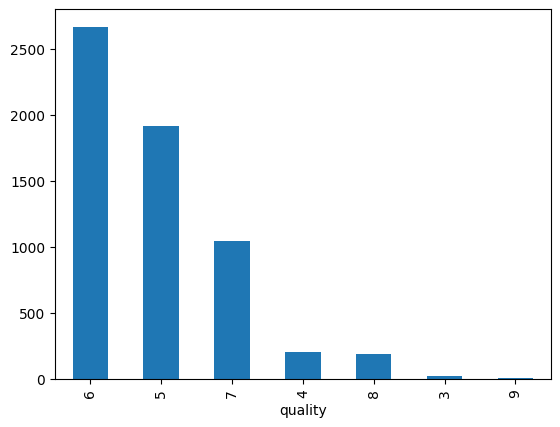

In [22]:
print(data['quality'].value_counts())
data['quality'].value_counts().plot(kind= 'bar')
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

X = data.drop(columns=['quality'])
y = data['quality']
print("Class distribution before resampling:", Counter(y))

pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy='auto', k_neighbors=3)),  
    ('under', RandomUnderSampler(sampling_strategy='auto')) 
])

X_resampled, y_resampled = pipeline.fit_resample(X, y)
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution before resampling: Counter({6: 2666, 5: 1915, 7: 1043, 4: 205, 8: 187, 3: 22, 9: 5})
Class distribution after resampling: Counter({3: 2666, 4: 2666, 5: 2666, 6: 2666, 7: 2666, 8: 2666, 9: 2666})


In [24]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)
vals = rf.feature_importances_
for i in range(len(X_resampled.columns)):
    print(X_resampled.columns[i],'-',round(vals[i],4))

fixed acidity - 0.1036
volatile acidity - 0.1037
citric acid - 0.087
residual sugar - 0.0747
chlorides - 0.1102
free sulfur dioxide - 0.0992
total sulfur dioxide - 0.0875
pH - 0.0974
sulphates - 0.086
alcohol - 0.1507


In [25]:
features_order = ['alcohol',
 'chlorides',
 'volatile acidity',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'citric acid',
 'sulphates',
 'total sulfur dioxide',
 'residual sugar']

### Based on the feature importance, these are the order of features 
['alcohol',
 'chlorides',
 'volatile acidity',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'citric acid',
 'sulphates',
 'total sulfur dioxide',
 'residual sugar']

In [26]:

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
models = [dt, rf, knn]
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    
    print(f"Model: {type(model).__name__}")
    print(f"Train Accuracy: {round(train_accuracy, 3)}")
    print(f"Test Accuracy: {round(test_accuracy, 3)}")
    print(f"Precision: {round(test_precision, 3)}")
    print(f"Recall: {round(test_recall, 3)}")
    print("------------------------------------")





Model: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.826
Precision: 0.824
Recall: 0.826
------------------------------------
Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.897
Precision: 0.894
Recall: 0.897
------------------------------------
Model: KNeighborsClassifier
Train Accuracy: 0.892
Test Accuracy: 0.832
Precision: 0.819
Recall: 0.832
------------------------------------


### Among all models, Random Forest gave the best metric values

### **Hyperparameter Tuning : Random Forest Classifier**

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],   
    'min_samples_split': [2, 5, 10],    }
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8899184428898035


In [28]:
rf = RandomForestClassifier(max_depth = 20,min_samples_split= 2, n_estimators =300)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
y_pred_test = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
print(f"Train Accuracy: {round(train_accuracy, 3)}")
print(f"Test Accuracy: {round(test_accuracy, 3)}")
print(f"Precision: {round(test_precision, 3)}")
print(f"Recall: {round(test_recall, 3)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.901
Precision: 0.898
Recall: 0.901
Classification Report:
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       790
           4       0.95      0.99      0.97       782
           5       0.82      0.80      0.81       799
           6       0.75      0.65      0.70       824
           7       0.83      0.90      0.86       812
           8       0.95      0.99      0.97       803
           9       1.00      1.00      1.00       789

    accuracy                           0.90      5599
   macro avg       0.90      0.90      0.90      5599
weighted avg       0.90      0.90      0.90      5599

Confusion Matrix:
[[790   0   0   0   0   0   0]
 [  1 772   4   4   1   0   0]
 [  2  25 638 121  12   1   0]
 [  3  17 132 533 127  12   0]
 [  0   1   6  50 729  26   0]
 [  0   0   0   0   8 795   0]
 [  0   0   0   0   1   0 788]]


#### Testing the model on new data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
testing = testing[data.columns]
for column in testing.drop(columns=['quality']).columns:
    testing[column] = scaler.fit_transform(testing[[column]])
    
X = testing.drop(columns=['quality'])
y = testing['quality']
y_test_pred= rf.predict(X)
accuracy = accuracy_score(y, y_test_pred)
precision = precision_score(y, y_test_pred, average='weighted')
recall = recall_score(y, y_test_pred, average='weighted')
print(f"Accuracy score: {round(accuracy, 3)}")
print(f"Precision: {round(precision, 3)}")
print(f"Recall: {round(recall, 3)}")
print()
print("Confusion Matrix:")
print(confusion_matrix(y, y_test_pred))
print()
print("Classification Report:")
print(classification_report(y, y_test_pred))

Accuracy score: 0.5
Precision: 0.574
Recall: 0.5

Confusion Matrix:
[[ 0  0  0  0  0]
 [ 2  9  3  1  0]
 [ 1  6 10  3  0]
 [ 1  0  5  5  0]
 [ 0  0  0  3  1]]

Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           5       0.60      0.60      0.60        15
           6       0.56      0.50      0.53        20
           7       0.42      0.45      0.43        11
           8       1.00      0.25      0.40         4

    accuracy                           0.50        50
   macro avg       0.51      0.36      0.39        50
weighted avg       0.57      0.50      0.52        50



In [43]:
d = np.array([[-0.57, -0.56, -0.32, -0.69, -0.34, -0.51, 0.26, 0.65, 0.52, 0.07],
              [-0.57, -0.56, -0.32, -0.69, -0.34, -0.51, 0.26, 0.65, 0.52, 50],
              [-100, -100,100,-100, -100, 100, -100, 100, 100, 100]])
for row in d:
    print(rf.predict(row.reshape(1,-1)))


[6]
[7]
[8]
